In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as spicystats
import sys

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, roc_curve

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score, log_loss

sys.path.insert(0, '../src')
sys.path.insert(0, '../data')


import chess

%load_ext autoreload
%autoreload 2


In [3]:
# Read in chess dataset and sample it. Drop columns containing immaterial data.

chess_df = chess.read_file('../data/games.csv')


{'Chess Outcomes Breakdown': resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64}


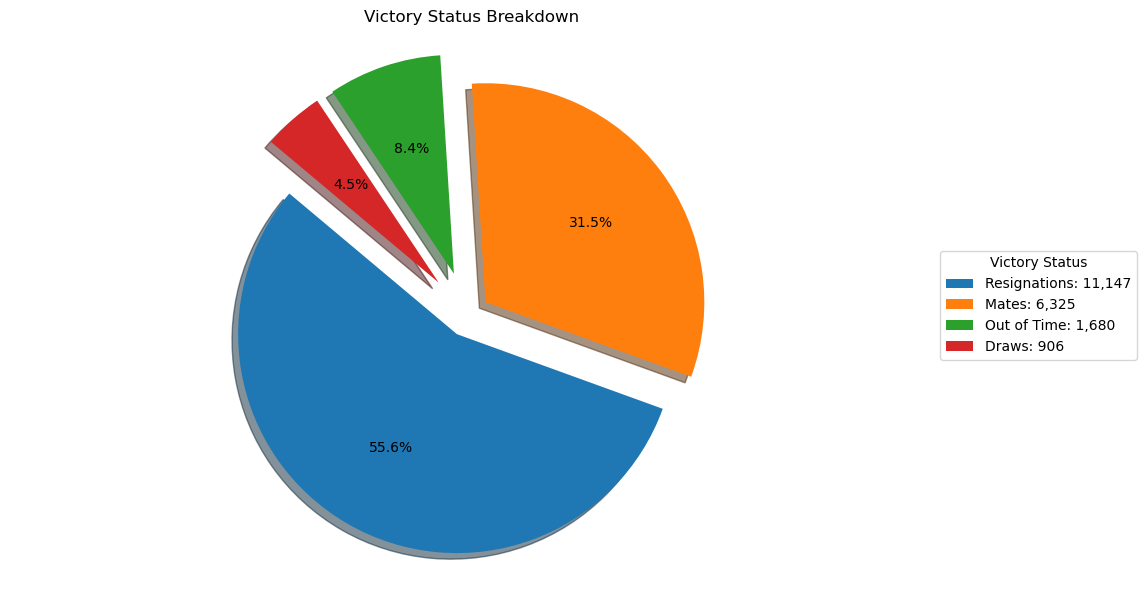

In [4]:
# Grab and count the chess victory status, broken down by category. Make pie chart to depict the delineations.
chess_outcomes_breakdown = chess.chess_victories(chess_df, path="../images/chess_outcomes_breakdown.png")


{'% of Victories': '95.48309901286271', '% of Draws': '4.516900987137302'}


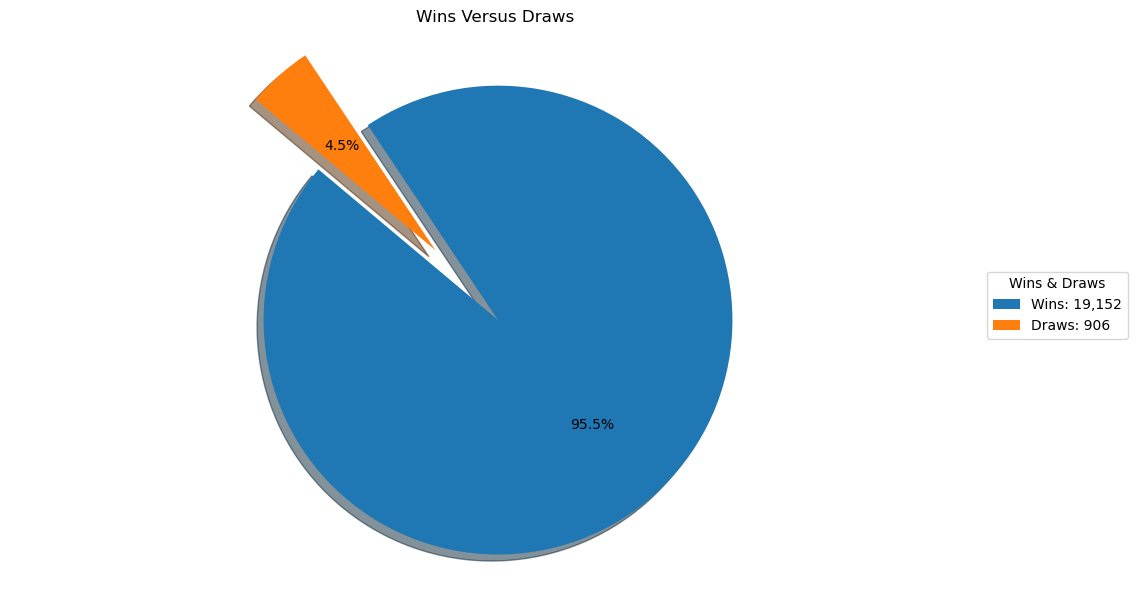

In [5]:
# Look at games won, by mate, out of time, and resignation, and compare to draws. Make pie charts for both delineations. 

wins_and_draws = chess.wins_versus_draws(chess_df, path="../images/wins_versus_draws.png")

In [6]:
# Null Hypothesis: The rating differential between black and white has no significant impact on which player wins the game.
# Alternate Hypothesis: The rating differential between black and white has a significant impact on which player wins the game.

c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_greater_100['winner'] = white_greater_100['winner'].apply(victory_status).astype(int)


{'White Superior Games':        turns victory_status  winner  white_rating  black_rating  \
0         13      outoftime       1          1500          1191   
5          5           draw       0          1250          1002   
9        119           mate       1          1381          1209   
10        39           mate       1          1381          1272   
19        25         resign       1          1500          1094   
...      ...            ...     ...           ...           ...   
20042     53         resign       1          1759          1265   
20044     37           mate       1          1523          1256   
20050      9      outoftime       1          1243          1142   
20053     24         resign       1          1691          1220   
20056    109         resign       1          1360          1227   

                                                   moves  \
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
5                                       e4 c5 Nf3 

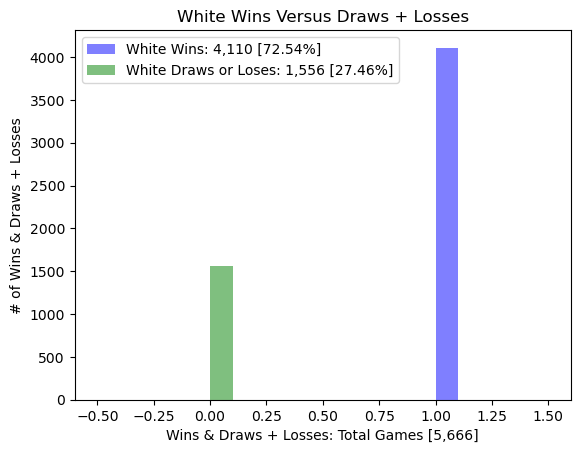

In [7]:
# Look at stronger white players, greater than 100 ELO, and map wins to 1 and draws or losses to 0.
# Perform t-test to analyze the p-value and ultimately the null & alternate hypotheses for white differentials.
# Histogram pot displaying white wins versus white draws when white is the superior opponent.

white_player_differentials = chess.chess_differentials_white(chess_df, path='../images/white_wins_vs_draws_&_losses.png')

# The p-value is less than 0.05, so we reject the null hypothesis and there is significant difference, or impact, 
# between the white rating differentials, with white being the superior opponent, and who wins the game.
# When only considering wins and draws plus losses of a higher-ranked white opponent, white wins 72.54% of the time and draws or loses 27.46% of the time over 5,666 games.

c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)


{' Black Superior Games':        turns victory_status  winner  white_rating  black_rating  \
7          9         resign       1          1413          2108   
11        38         resign       1          1381          1867   
12        60         resign       1          1381          1936   
13        31         resign       1          1381          1607   
18       101         resign       1          1094          1300   
...      ...            ...     ...           ...           ...   
20036     43           mate       0          1247          1436   
20038     36         resign       1          1247          1359   
20040     87         resign       1          1261          1461   
20041     58           mate       1          1263          1770   
20057     78           mate       1          1235          1339   

                                                   moves  \
7                         e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4   
11     e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 

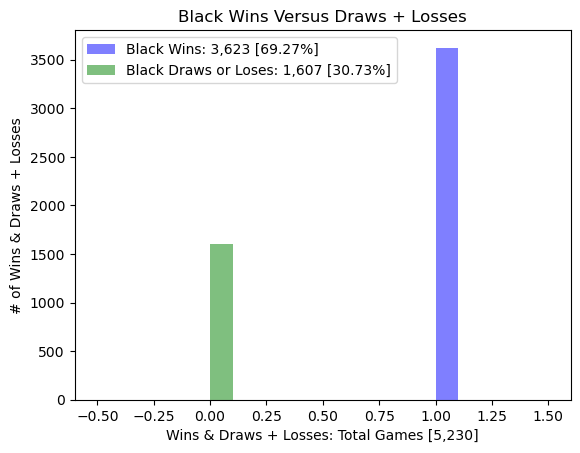

In [8]:
# Look at stronger black players, greater than 100 ELO, and map black wins to 1 and black draws or losses to 0.
# Perform t-test to analyze the p-value and ultimately the null & alternate hypotheses for black differentials.
# Histogram plot displaying black wins versus black draws and losses when black is the superior opponent.

black_player_differentials = chess.chess_differentials_black(chess_df, path="../images/black_wins_vs_draws_&_losses.png")

# The p-value is less than 0.05, so we reject the null hypothesis and there is significant difference, or impact, 
# between the black rating differentials, with black being the superior opponent, and who wins the game.
# When only considering wins and draws plus losses of a higher-ranked black opponent, black wins 69.27% of the time and draws or loses 30.73% of the time over 5,230 games.

c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_greater_100['winner'] = white_greater_100['winner'].apply(victory_status).astype(int)


{'White Superior Games':        turns victory_status  winner  white_rating  black_rating  \
0         13      outoftime       1          1500          1191   
5          5           draw       0          1250          1002   
9        119           mate       1          1381          1209   
10        39           mate       1          1381          1272   
19        25         resign       1          1500          1094   
...      ...            ...     ...           ...           ...   
20042     53         resign       1          1759          1265   
20044     37           mate       1          1523          1256   
20050      9      outoftime       1          1243          1142   
20053     24         resign       1          1691          1220   
20056    109         resign       1          1360          1227   

                                                   moves  \
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
5                                       e4 c5 Nf3 

c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)


{' Black Superior Games':        turns victory_status  winner  white_rating  black_rating  \
7          9         resign       1          1413          2108   
11        38         resign       1          1381          1867   
12        60         resign       1          1381          1936   
13        31         resign       1          1381          1607   
18       101         resign       1          1094          1300   
...      ...            ...     ...           ...           ...   
20036     43           mate       0          1247          1436   
20038     36         resign       1          1247          1359   
20040     87         resign       1          1261          1461   
20041     58           mate       1          1263          1770   
20057     78           mate       1          1235          1339   

                                                   moves  \
7                         e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4   
11     e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 

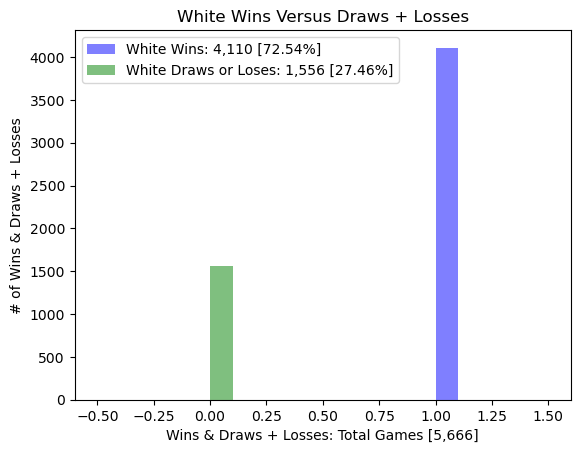

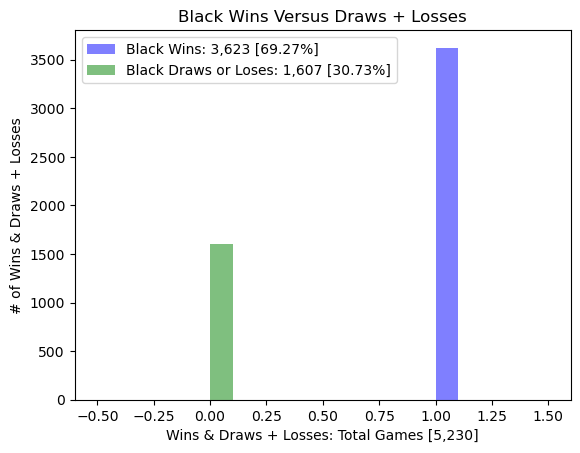

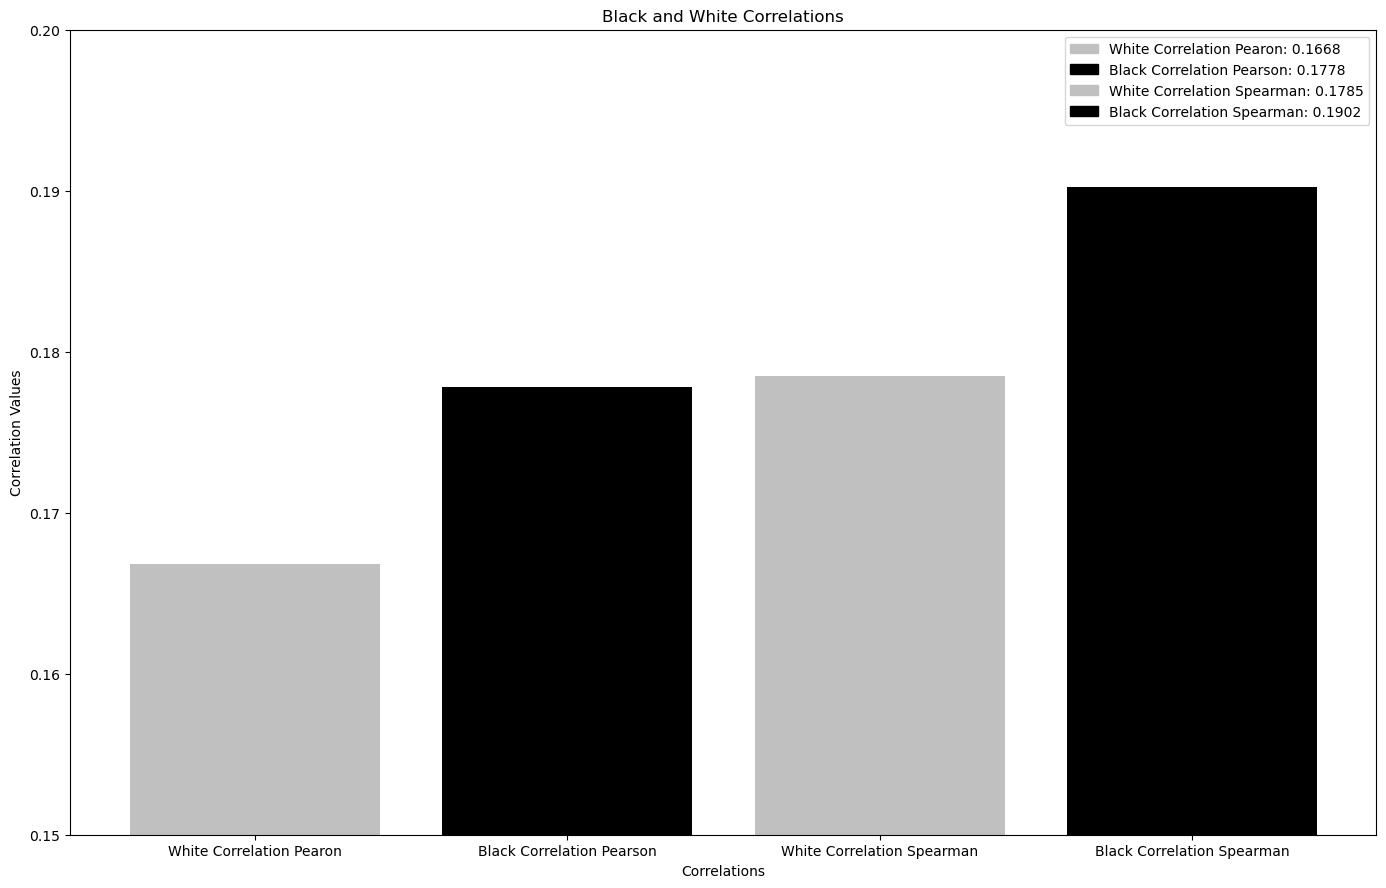

In [9]:
# Perform nonlinear Spearman correlation to see potential correlations between rating differentals, fow white and black respectively, and their victory status.

all_correlations = chess.chess_correlations(chess.chess_differentials_white(chess_df, path='../images/white_wins_vs_draws_&_losses.png'), chess.chess_differentials_black(chess_df, path="../images/black_wins_vs_draws_&_losses.png"), path='../images/correlations.png')

# There is no true correlation between white or black being a significantly stronger opponent, in terms of ELO rating, 
# and winning games versus losing or drawing games, as seen from the linear, Pearson correlations and the nonlinear, Spearman correlations below.

c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'Mean Accuracy List [White]': 0.7241869102467685, 'Mean Precision List [White]': 0.7269788739604193, 'Mean Recall List [White]': 0.9923606767531856, 'Mean F1 Score [White]': 0.8390746304263589, 'Mean Log Loss [White]': 0.56597276258706, 'Mean Log Loss Probability [White]': 0.5696417546743453}


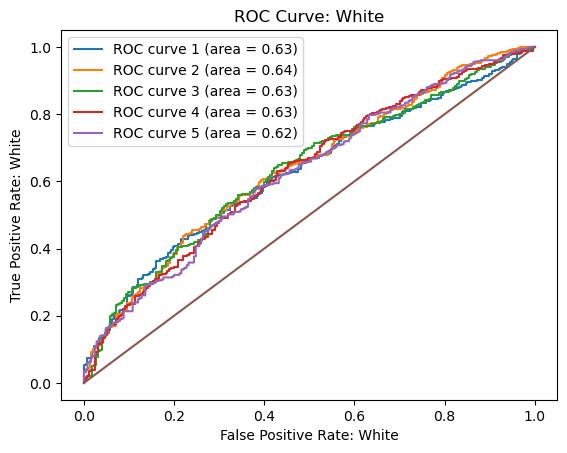

In [15]:
# Logistic Regression for white with 5 folds to determine true positive rate, or probability of detection, as a fucntion of false positive rate, or probability of false alarm. 
# Also, across all 5 folds, the average accuracy, precision, recall, F1 Score, and log loss were determined for white.

white_log_reg = chess.test_train_white(chess_df, path='../images/roc_curve_white.png')

c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_score_list = []


{'Mean Accuracy List [Black]': 0.6938336391647087, 'Mean Precision List [Black]': 0.6939381807737008, 'Mean Recall List [Black]': 0.99831700261825, 'Mean F1 Score [Black]': 0.8186441686809387, 'Mean Log Loss [Black]': 0.59693444826149, 'Mean Log Loss Probability [Black]': 0.5162497093934687}


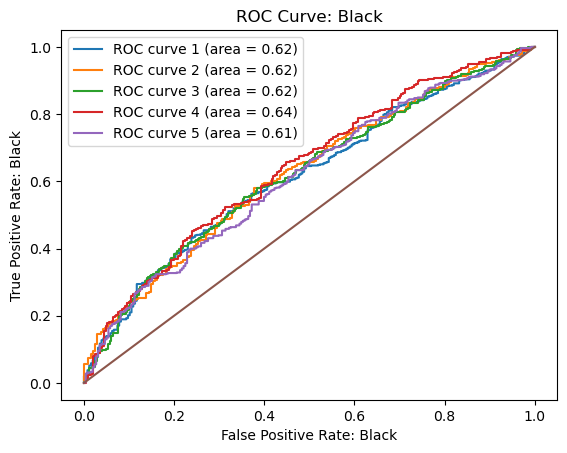

In [14]:
# Logistic Regression for black with 5 folds to determine true positive rate, or probability of detection, as a fucntion of false positive rate, or probability of false alarm. 
# Also, across all 5 folds, the average accuracy, precision, recall, F1 Score, and log loss were determined for black.

black_log_reg = chess.test_train_black(chess_df, path='../images/roc_curve_black.png')